Show the jpg containing the 2d plane of the handball pitch according to the regulations(all the keypoints and lines). The jpg is saved at path pitch_template.jpg

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

I'll display the handball pitch image for you:

```python
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('pitch_template.jpg')
plt.figure(figsize=(12,8))
plt.imshow(img)
plt.axis('off')
plt.tight_layout()
plt.show()
```

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

def show_img(img_path):
    img = Image.open(img_path)
    plt.figure(figsize=(12,8))
    plt.imshow(img)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

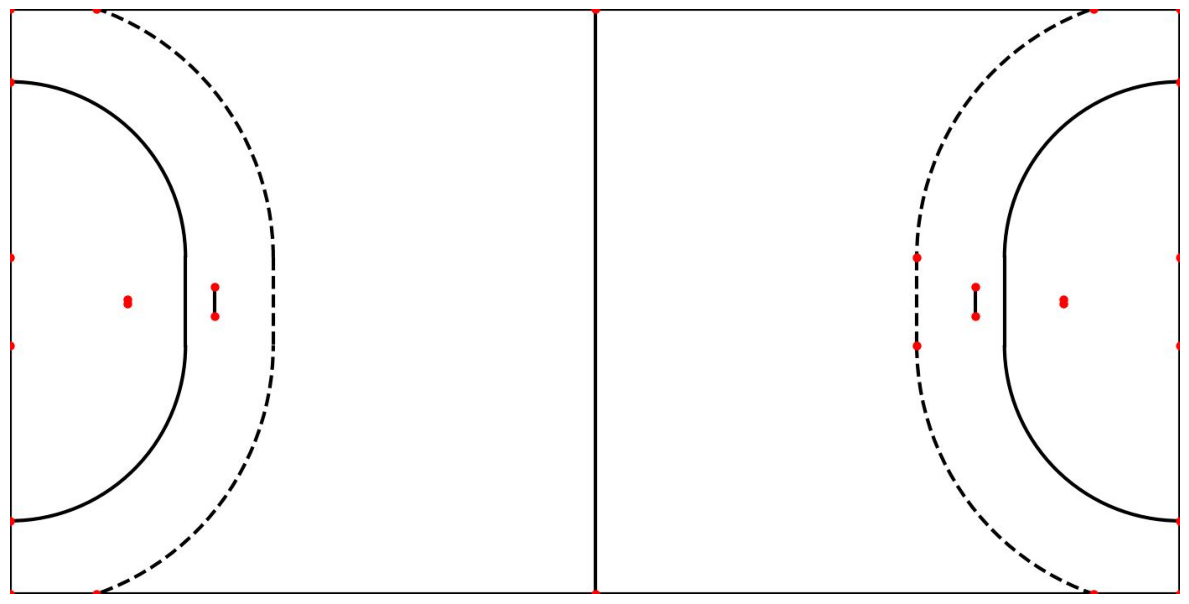

In [ ]:
show_img('pitch_template.jpg')

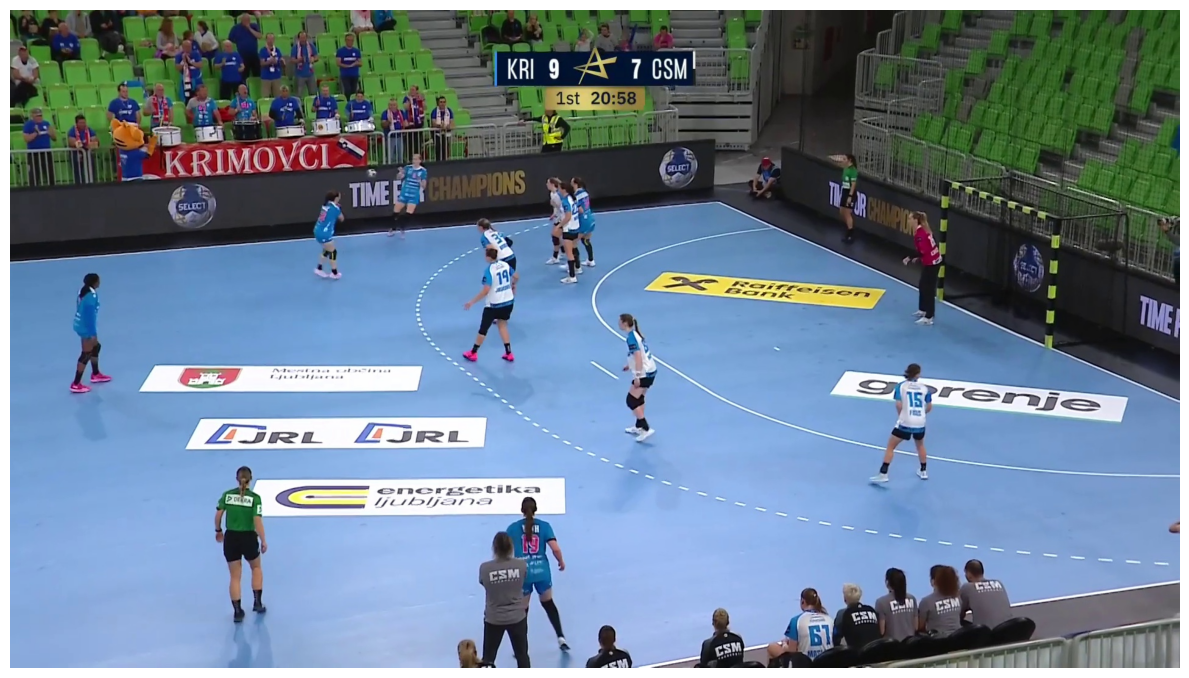

In [ ]:
show_img('sampled_frames/frame_004.jpg')

Ok we have the following situation. we have an image/frame from a handball match. We will have the coordinates for some lines of the handball pitch as they are captured by the camera, more specifically 2 pixels point coordinates for each line. The 7m line and the upper sideline of the pitch. 2 points should be enough to define a line. What I want you is to write code that calculates the intersection for these two lines and then plot it over the image, along with the lines.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

```python
def line_intersect(p1, p2, p3, p4):
    "Find intersection of line through p1,p2 and line through p3,p4"
    x1,y1 = p1; x2,y2 = p2; x3,y3 = p3; x4,y4 = p4
    denom = (x1-x2)*(y3-y4) - (y1-y2)*(x3-x4)
    if abs(denom) < 1e-10: return None
    t = ((x1-x3)*(y3-y4) - (y1-y3)*(x3-x4)) / denom
    return (x1 + t*(x2-x1), y1 + t*(y2-y1))

line1_p1,line1_p2 = (100,200), (400,200)
line2_p1,line2_p2 = (250,100), (250,300)
intersect = line_intersect(line1_p1, line1_p2, line2_p1, line2_p2)

img = Image.open('pitch_template.jpg')
plt.figure(figsize=(12,8))
plt.imshow(img)
plt.plot([line1_p1[0],line1_p2[0]], [line1_p1[1],line1_p2[1]], 'r-', linewidth=2, label='7m line')
plt.plot([line2_p1[0],line2_p2[0]], [line2_p1[1],line2_p2[1]], 'b-', linewidth=2, label='sideline')
if intersect: plt.plot(intersect[0], intersect[1], 'go', markersize=10, label='intersection')
plt.legend()
plt.axis('off')
plt.tight_layout()
plt.show()
intersect
```

In [ ]:
def line_intersect(p1, p2, p3, p4):
    "Find intersection of line through p1,p2 and line through p3,p4"
    x1,y1 = p1; x2,y2 = p2; x3,y3 = p3; x4,y4 = p4
    denom = (x1-x2)*(y3-y4) - (y1-y2)*(x3-x4)
    if abs(denom) < 1e-10: return None
    t = ((x1-x3)*(y3-y4) - (y1-y3)*(x3-x4)) / denom
    return (x1 + t*(x2-x1), y1 + t*(y2-y1))

line1_p1,line1_p2 = (954.6,577.9), (997,605.6)
line2_p1,line2_p2 = (0,416.0), (1162.2,317.1)
intersect = line_intersect(line1_p1, line1_p2, line2_p1, line2_p2)
print(intersect)

def plot_image_with_lines(img_path):
    img = Image.open('sampled_frames/frame_004.jpg')
    plt.figure(figsize=(12,8))
    plt.imshow(img)
    plt.plot([line1_p1[0],line1_p2[0]], [line1_p1[1],line1_p2[1]], 'r-', linewidth=2, label='7m line')
    plt.plot([line2_p1[0],line2_p2[0]], [line2_p1[1],line2_p2[1]], 'b-', linewidth=2, label='sideline')
    if intersect: plt.plot(intersect[0], intersect[1], 'go', markersize=10, label='intersection')
    plt.legend()
    plt.axis('off')
    plt.tight_layout()
    plt.show()

(625.328458568198, 362.78628071554397)


(1936.9956587028587, 935.5471991271075)


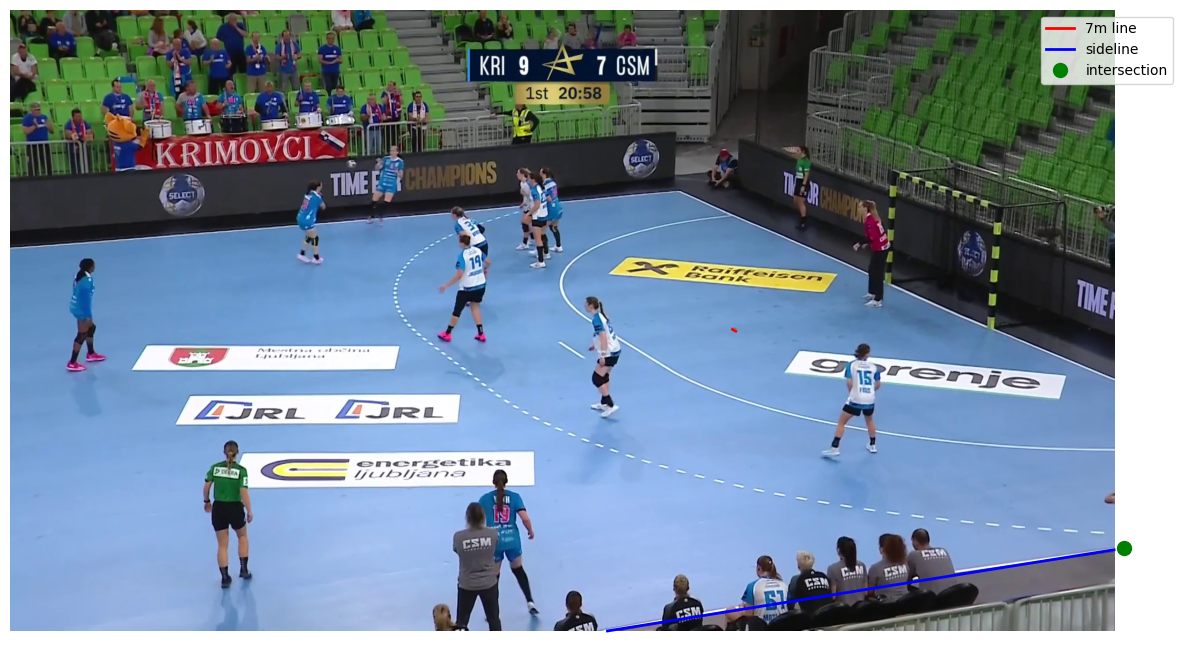

In [ ]:

line1_p1,line1_p2 = (1261.5, 558.166,), (1255.833,555.0)
line2_p1,line2_p2 = (1038.4,1079.6), (1919.2,938.4)
# line2_p1,line2_p2 = (0,416.0), (1162.2,317.1)
intersect = line_intersect(line1_p1, line1_p2, line2_p1, line2_p2)
print(intersect)
plot_image_with_lines('sampled_frames/frame_004.jpg')

Great. Now the wuestion is, geometrically, does this intersection corresponds to the intersection of the 2 lines on the 2d plane ? or does the camera projection distorts that ? I'm asking if I can use that intersection point for homography calculation, considering I know the 2d coordinates of it already

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

The intersection point in the image does **not** generally correspond to the same intersection point on the 2D plane due to perspective distortion from the camera projection.

However, this is actually **good news** for homography calculation! Here's why:

**Perspective properties preserved:**
- Straight lines remain straight under perspective projection
- Points on lines remain on lines
- Collinearity is preserved (if 3 points are collinear in 3D, they're collinear in the image)
- **Line intersections are preserved** - if two lines intersect at a point in the real world, their projections intersect at the corresponding projected point in the image

So yes, you **can** use the intersection point for homography! If you know:
- The 2D pitch coordinates where the 7m line and sideline intersect (e.g., from pitch regulations)
- The pixel coordinates of that intersection (calculated from the line endpoints in the image)

Then this point-correspondence is just as valid as any other point correspondence for computing the homography matrix.

In fact, using intersection points can be advantageous because:
1. They're often easier to identify accurately than individual points
2. You get "free" correspondences from lines you've already marked
3. They're geometrically constrained, which can improve robustness

You typically need 4 point correspondences to compute a homography. Line intersections are a great way to get some of those points.

Great. I will make great use of these intersections then, by identifying specific lines on the handball pitch and calculating their intersections. Now the question remains: how to get the lines(e.g. sideline, 7m line, 4m line)? I was gonna use high resolution networks for identifying specific points/keypoints on the pitch, but not sure how to handle for lines. I mean, 2 points are probably enough for identifying lines, so annotating two keypoints(they dont actually have to be the same keypoints on every input image) on the specific lines and then predicting them and, thus, the lines might be an option. Or maybe annotate more(3,4, etc) and then use lsq-error on the prediction of the hr net in order to get the lines ? Or should the hr net directly get the lines ? What do you think

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Great question! Here's my thinking:

**Multiple keypoints + line fitting (option 2) is the most practical approach.** Here's why:

1. **Robustness**: With 3-4 keypoints per line, one bad prediction doesn't ruin your line. LSQ (or even better, RANSAC) will give you a robust fit.

2. **HRNet strengths**: HRNets are designed for keypoint detection - they excel at precise spatial localization. Asking them to directly regress line parameters is awkward (line representations have issues: angles wrap, endpoints are arbitrary, etc.).

3. **Annotation flexibility**: You're right that the keypoints don't need to be semantically identical across frames. Just annotate points *on* the line - could be wherever it's most visible. This makes annotation much easier.

4. **Practical workflow**:
   - Annotate ~3-4 points per important line (sidelines, 7m, 6m, 4m, goal line, etc.)
   - HRNet predicts all keypoints with confidence scores
   - Fit lines using RANSAC (handles occlusions/bad predictions gracefully)
   - Calculate intersections for homography

**Why RANSAC over pure LSQ**: Players/occlusions may cause some keypoints to be way off. RANSAC will ignore outliers automatically.

**Alternative to consider**: If lines are very visible, you could also try semantic segmentation of pitch lines + Hough transform, but the keypoint approach gives you more control over *which* specific lines you're detecting.

Want to start by defining the keypoints you'll annotate for each line?

Great. I have all these points in order to help me calculate the homography transformation between handball 2d pitch and real camera footage from matches.
{'corner_left_up': (-20.0, 10.0), 'corner_left_down': (-20.0, -10.0), 'corner_right_up': (20.0, 10.0), 'corner_right_down': (20.0, -10.0), 'seven_left_up': (-13.0, 0.5), 'seven_left_down': (-13.0, -0.5), 'seven_right_up': (13.0, 0.5), 'seven_right_down': (13.0, -0.5), 'four_left_up': (-16.0, 0.075), 'four_left_down': (-16.0, -0.075), 'four_right_up': (16.0, 0.075), 'four_right_down': (16.0, -0.075), 'six_goalline_left_up': (-20.0, 7.5), 'six_goalline_left_down': (-20.0, -7.5), 'six_goalline_right_up': (20.0, 7.5), 'six_goalline_right_down': (20.0, -7.5), 'nine_sideline_left_up': (-17.042, 10.0), 'nine_sideline_left_down': (-17.042, -10.0), 'nine_sideline_right_up': (17.042, 10.0), 'nine_sideline_right_down': (17.042, -10.0), 'nine_parallel_right_up': (11.0, 1.5), 'nine_parallel_right_down': (11.0, -1.5), 'middle_sideline_up': (0.0, 10.0), 'middle_sideline_down': (0.0, -10.0), 'goal_post_left_up': (-20.0, 1.5), 'goal_post_left_down': (-20.0, -1.5), 'goal_post_right_up': (20.0, 1.5), 'goal_post_right_down': (20.0, -1.5), 'seven_sideline_right_up': (13.0, 10.0)}

The problem is that sometimes many of them are not visible, not in the visual field of the camera or occluded by players, objects, etc. I wwant you to help me find other reference points, mainly on the ellipses/arcs on the 9m line or goal area line, that could help me further. according to the rules:
In front of each goal there is a goal area (see diagram 5). The goal area is defined by the goal-area
line (6-metre line), which is drawn as follows:
a. 3 metres long line directly in front of the goal; this line is parallel to the goal line and 6 metres
away from it (measured from the rear edge of the goal line to the front edge of the goal-area
line);
b. two quarter circles, each with a radius of 6 metres (measured from the rear inner corner of the
goalposts), connecting the 3 metres long line with the outer goal line (see diagrams 1a, 1b and
2a).
5. The free throw line (9-metre line) is a broken line, drawn 3 metres outside the goal-area line. Both
the segments of the line and the spaces between them measure 15 cm (see diagrams 1a and 1b).

Now the wuestion is: can we use these ellipses somehow, is it worth it to have a machine learning model segment them and use them for identifying other reference points with specific coordinates to map to the 2d pitch ? How ? Or maybe just the lines uniting the arcs/ellipses ?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Great question! Yes, you can extract useful reference points from the arcs. Here's the key insight:

**Geometrically useful points on arcs:**

1. **Tangent/transition points** - where arcs meet straight line segments (well-defined, easy to locate)
2. **Apex points** - the furthest point of each arc from the goal line
3. **Intersections** - where arcs cross other visible lines (sidelines, 7m line, etc.)

The 6m arc is a quarter circle (radius 6m) centered at the inner goalpost corners. The 9m arc is 3m outside that (effectively radius 9m from the same centers).

Let me calculate the additional keypoints:

```python
import math

goalposts = dict(left_up=(-20, 1.5), left_down=(-20, -1.5), right_up=(20, 1.5), right_down=(20, -1.5))

def arc_points(cx, cy, r, side='left'):
    sign = -1 if side == 'left' else 1
    apex = (cx + sign*r, cy)
    tangent_straight = (cx + sign*r, cy)
    sideline_y = 10 if cy > 0 else -10
    dx = math.sqrt(r**2 - (sideline_y - cy)**2) if r >= abs(sideline_y - cy) else None
    sideline_intersect = (cx + sign*dx, sideline_y) if dx else None
    return dict(apex=apex, sideline=sideline_intersect)

six_left_up = arc_points(-20, 1.5, 6, 'left')
six_left_down = arc_points(-20, -1.5, 6, 'left')
nine_left_up = arc_points(-20, 1.5, 9, 'left')
nine_left_down = arc_points(-20, -1.5, 9, 'left')

dict(six_left_up=six_left_up, six_left_down=six_left_down, nine_left_up=nine_left_up, nine_left_down=nine_left_down)
```

**Is ML segmentation worth it?**

Rather than segmenting the entire arc, I'd recommend:
1. **Detect the transition points** where arcs meet straight segments - these are sharp/distinct features
2. **Detect arc-line intersections** (e.g., 9m arc crossing the sideline)
3. If you do segment arcs, **fit a conic** to extract parameterized points rather than using raw pixels

The straight segments connecting arcs (the 3m line in front of goal, the dashed 9m segments) are probably more reliable for homography since they give you clean line endpoints.

And where would it be easier to find those inflection points between the straight line and the arcs ? the 9m line is drawn as a hatched line, the goal area one is continous

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

The **6m goal area line** is much easier for detecting those inflection points because:

1. **Continuous line** - you get an unbroken contour to work with
2. **Clear transition** - the point where the straight 3m segment meets the quarter circle is a distinct curvature change
3. **No gaps** - the 9m hatched line might have the transition point fall in a gap between dashes

For the 9m line, the hatching makes it tricky - you'd need to either:
- Fit a curve through multiple dash segments (noisy)
- Hope a dash happens to land right at the transition point (unreliable)

So I'd recommend focusing on the **6m arc transition points**. Let me calculate those coordinates:

```python
six_arc_transitions = dict(
    left_up_inner=(-20, 4.5), left_up_outer=(-17, 1.5),
    left_down_inner=(-20, -4.5), left_down_outer=(-17, -1.5),
    right_up_inner=(20, 4.5), right_up_outer=(17, 1.5),
    right_down_inner=(20, -4.5), right_down_outer=(17, -1.5))
six_arc_transitions
```

These are where the quarter circles (r=6m from goalpost corners) meet the straight segments - the inner ones on the goal line, the outer ones on the 3m front segment.

I get that. But it s actually very hard for me as a human to annotate those points accurately. Is there some tool to help with that or another approach ?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

A few options:

**1. Semi-automated with OpenCV** - detect the 6m line contour, then find curvature change points algorithmically:

```python
import cv2

def find_curvature_peaks(contour, window=15):
    "Find points where curvature changes sharply (straight to arc transitions)"
    pts = contour.squeeze()
    curvatures = []
    for i in range(window, len(pts)-window):
        v1 = pts[i] - pts[i-window]
        v2 = pts[i+window] - pts[i]
        angle = np.arctan2(v2[1],v2[0]) - np.arctan2(v1[1],v1[0])
        curvatures.append(abs(angle))
    idx = np.argsort(curvatures)[-4:]
    return pts[idx + window]
```

**2. Interactive tools with zoom** - CVAT or Label Studio let you zoom way in for pixel-accurate clicks

**3. Fit-then-extract approach** - roughly trace the 6m line, then fit a geometric model (two quarter circles + straight segment) to your traced points. The model gives you exact transition coordinates. This is probably the most robust since it's noise-tolerant.

**4. Corner/keypoint detectors** - Harris or Shi-Tomasi might pick up the transition as a "corner" since the curvature changes sharply

I'd suggest option 3 - you just need to click roughly along the 6m line (maybe 10-15 points), then fit the known geometric shape. Want me to write a curve fitting function for that?